In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
college=pd.read_csv("E:/imarticus/excels/College_Data.txt")
college.rename(columns={"Unnamed: 0":"Collegename","S.F.Ratio":"S_F_Ratio","Grad.Rate":"Grad_Rate","F.Undergrad":"F_Undergrad","P.Undergrad":"P_Undergrad","Room.Board":"Room_Board","perc.alumni":"perc_alumni"},inplace=True)
college.head(30)

,Collegename,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [3]:
college.shape

(777, 19)

In [4]:
college.isnull().sum()

Collegename    0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
Outstate       0
Room_Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S_F_Ratio      0
perc_alumni    0
Expend         0
Grad_Rate      0
dtype: int64

In [5]:
college.info

<bound method DataFrame.info of                         Collegename Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         28

In [6]:
college.S_F_Ratio=college.S_F_Ratio.replace(college.S_F_Ratio.max(),100)

In [7]:
college.Collegename[college.Grad_Rate==college.Grad_Rate.max()]

95    Cazenovia College
Name: Collegename, dtype: object

In [8]:
Q1=college.Grad_Rate.quantile(0.25)
Q3=college.Grad_Rate.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)
'''college.Grad_Rate[college.Grad_Rate>UE]=UE
college.Grad_Rate[college.Grad_Rate<LE]=LE'''

53.0 78.0 25.0 115.5 15.5


'college.Grad_Rate[college.Grad_Rate>UE]=UE\ncollege.Grad_Rate[college.Grad_Rate<LE]=LE'

In [9]:
college.Grad_Rate=college.Grad_Rate.replace(college.Grad_Rate.max(),100)

In [10]:
college.Grad_Rate.max()

100

In [11]:
college.Grad_Rate[college.Grad_Rate>100].sum()

0

In [12]:
college.profLoss=college.Outstate/college.Expend

C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_21824/4231359893.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  college.profLoss=college.Outstate/college.Expend


In [13]:
college.profLoss

0      1.056668
1      1.166524
2      1.287922
3      0.681531
4      0.692181
         ...   
772    1.520922
773    1.253673
774    0.829028
775    0.491259
776    1.106676
Length: 777, dtype: float64

In [14]:
college.profLoss.max()

2.6436781609195403

In [15]:
college.Collegename[college.profLoss==college.profLoss.max()]

317    Lindenwood College
Name: Collegename, dtype: object

In [16]:
college.profLoss.min()

0.27152641878669276

In [17]:
college.Collegename[college.profLoss==college.profLoss.min()]

603    University of Alabama at Birmingham
Name: Collegename, dtype: object

In [21]:
a=college.drop(["Collegename","Private"],axis=1)
X=a.iloc[:11]

In [22]:
X

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [23]:
from sklearn.preprocessing import normalize
X1=normalize(X)

In [24]:
import scipy.cluster.hierarchy as shc
link=shc.linkage(X1)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [65.0, 65.0, 90.0, 90.0],
  [55.0, 55.0, 77.5, 77.5],
  [45.0, 45.0, 66.25, 66.25],
  [35.0, 35.0, 55.625, 55.625],
  [25.0, 25.0, 45.3125, 45.3125],
  [10.0, 10.0, 35.15625, 35.15625]],
 'dcoord': [[0.0, 0.12086278215441965, 0.12086278215441965, 0.0],
  [0.0, 0.04508128413722419, 0.04508128413722419, 0.0],
  [0.0, 0.05113213357563551, 0.05113213357563551, 0.0],
  [0.04508128413722419,
   0.09022784273099921,
   0.09022784273099921,
   0.05113213357563551],
  [0.0, 0.09134527132412805, 0.09134527132412805, 0.09022784273099921],
  [0.0, 0.09988149460125453, 0.09988149460125453, 0.09134527132412805],
  [0.0, 0.14215500815720108, 0.14215500815720108, 0.09988149460125453],
  [0.0, 0.15782475575373076, 0.15782475575373076, 0.14215500815720108],
  [0.0, 0.17622749126367518, 0.17622749126367518, 0.15782475575373076],
  [0.12086278215441965,
   0.2628289165315877,
   0.

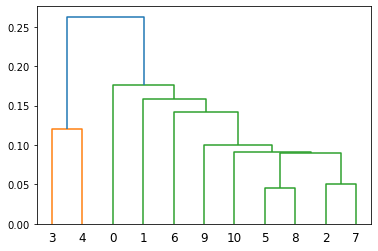

In [25]:
shc.dendrogram(link)

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [40]:
clustering = AgglomerativeClustering(n_clusters = 3)
clustering.fit(link)

In [48]:
clabel=clustering.labels_
t= pd.DataFrame(clabel)

In [49]:
b=college.Collegename[:11]
data=pd.concat([b,t,X],axis=1)

In [54]:
data.rename(columns={0:"cluster"},inplace=True)
data.head(10)

,Collegename,cluster,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1.0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1.0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0.0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,0.0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,0.0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,1.0,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,0.0,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,2.0,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,2.0,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,0.0,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [58]:
data.to_excel("D:/Work Space/college.xlsx") # to save as a excel

In [59]:
data.to_csv("D:/Work Space/college1.csv") # to save as a csv